## Import

In [1]:
# importing the libraries
import os
import pandas as pd
import numpy as np
from itertools import chain
from IPython.display import clear_output

# for reading and displaying images
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.models.model_util import load_model, save_checkpoint

# other files
from src.training.run import *
from src.data.data_util import *

# Torch
from torch.optim import *
import torch.optim as optim
from torchsummary import summary
# from tensorboardX import SummaryWriter

# Maintenance
import mlflow
from DeepNotion.build import *

# CAM - M3dCam
# from medcam import medcam

## Load Configurations

In [2]:
from src.config import *
cfg = load_config()

## MLFlow Init

In [5]:
exp_name = '3dcnn_smri_comparison_test'
try:
    mlflow.create_experiment(name=exp_name)
except:
    print('Existing experiment')
    
mlflow.set_experiment(exp_name)

Existing experiment


## Tracking on Notion

In [5]:
cfg['notion']['use'] = False

### Load Preexisting page

In [6]:
if cfg['notion']['use']:
    root, client = login(cfg['notion'])
    page = root.children[-1]

### Make New Page

In [18]:
if cfg['notion']['use']:

    print(today())
    root, client = login(cfg['notion'])
    page = make_page(root)

    toggle = page.children.add_new(ToggleBlock, title='Configuration')

    print("Saving Configurations ...")
    for name, value in cfg.get_dict().items():
        if name not in ['notion']:
            txt = '**' + name + '** ' + str(value)
            print(txt)
            toggle.children.add_new(BulletedListBlock, title=txt)

#     fold_db = make_db(page, schema=cfg.schema)
#     test_db = make_db(page, schema=cfg.test_schema)

2021.02.08.20:14


## Train

### No Fold

In [6]:
cfg.model_name = 'resnet_no_maxpool'
model, cfg.device = load_model(cfg.model_name, verbose=False)

cfg.registration = 'tlrc'
print(cfg.device)

optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

trn_dp, tst_dp = DataPacket(), DataPacket()

run_name = today().replace('.', '_').replace(':', '')
mlflow.start_run(run_name='No Augmentation, 100 epochs, no maxpool resnet')

Model Resnet_no_maxpool is selected.
cuda:0


<ActiveRun: >

Epoch 1 / 100, BEST MAE 8.000
[train] 58.5 sec [valid] 14.7 sec 
[TRAIN]:: Loss=3553.077 Mae=57.424 Rmse=59.546 Corr=0.467 
[TEST ]:: Loss=3654.997 Mae=58.105 Rmse=60.400 Corr=0.523 


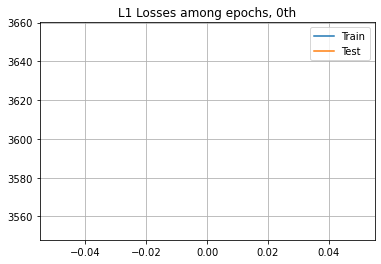

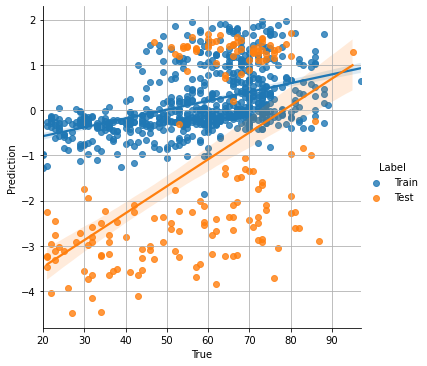

Epoch 2 / 100, BEST MAE 8.000
[train] 54.7 sec [valid] 13.8 sec 
[TRAIN]:: Loss=3460.517 Mae=56.751 Rmse=58.763 Corr=0.681 
[TEST ]:: Loss=3486.788 Mae=56.831 Rmse=58.989 Corr=0.753 
Epoch 3 / 100, BEST MAE 8.000
[train] 54.9 sec [valid] 13.9 sec 
[TRAIN]:: Loss=3406.970 Mae=56.298 Rmse=58.305 Corr=0.701 
[TEST ]:: Loss=3385.628 Mae=55.848 Rmse=58.122 Corr=0.781 
Epoch 4 / 100, BEST MAE 8.000
[train] 55.1 sec [valid] 14.0 sec 
[TRAIN]:: Loss=3361.722 Mae=55.904 Rmse=57.915 Corr=0.708 
[TEST ]:: Loss=3355.631 Mae=55.604 Rmse=57.864 Corr=0.779 
Epoch 5 / 100, BEST MAE 8.000
[train] 56.1 sec [valid] 13.9 sec 
[TRAIN]:: Loss=3318.400 Mae=55.523 Rmse=57.540 Corr=0.711 
[TEST ]:: Loss=3305.818 Mae=55.135 Rmse=57.431 Corr=0.785 
Epoch 6 / 100, BEST MAE 8.000
[train] 55.0 sec [valid] 13.9 sec 
[TRAIN]:: Loss=3274.911 Mae=55.144 Rmse=57.161 Corr=0.714 
[TEST ]:: Loss=3280.027 Mae=54.925 Rmse=57.208 Corr=0.775 


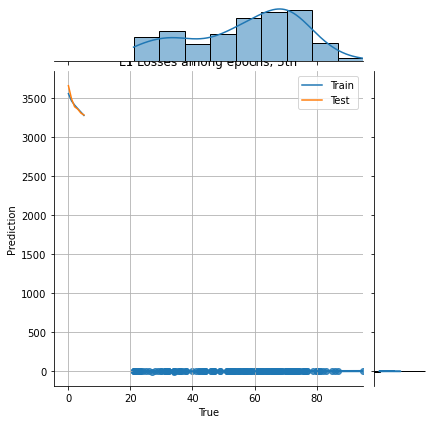

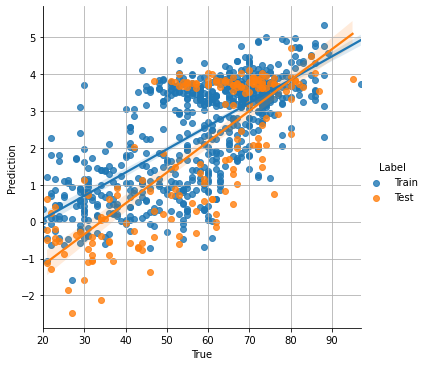

Epoch 7 / 100, BEST MAE 8.000
[train] 54.4 sec [valid] 13.7 sec 
[TRAIN]:: Loss=3231.456 Mae=54.761 Rmse=56.779 Corr=0.714 
[TEST ]:: Loss=3208.535 Mae=54.262 Rmse=56.578 Corr=0.787 
Epoch 8 / 100, BEST MAE 8.000
[train] 54.9 sec [valid] 13.8 sec 
[TRAIN]:: Loss=3187.020 Mae=54.369 Rmse=56.387 Corr=0.716 
[TEST ]:: Loss=3096.045 Mae=53.176 Rmse=55.572 Corr=0.814 
Epoch 9 / 100, BEST MAE 8.000
[train] 54.5 sec [valid] 13.8 sec 
[TRAIN]:: Loss=3142.494 Mae=53.973 Rmse=55.990 Corr=0.717 
[TEST ]:: Loss=3117.652 Mae=53.454 Rmse=55.770 Corr=0.779 
Epoch 10 / 100, BEST MAE 8.000
[train] 54.4 sec [valid] 13.7 sec 
[TRAIN]:: Loss=3096.036 Mae=53.565 Rmse=55.574 Corr=0.716 
[TEST ]:: Loss=3010.785 Mae=52.443 Rmse=54.801 Corr=0.817 
Epoch 11 / 100, BEST MAE 8.000
[train] 54.8 sec [valid] 13.9 sec 
[TRAIN]:: Loss=3050.413 Mae=53.156 Rmse=55.162 Corr=0.717 
[TEST ]:: Loss=3044.730 Mae=52.787 Rmse=55.114 Corr=0.755 


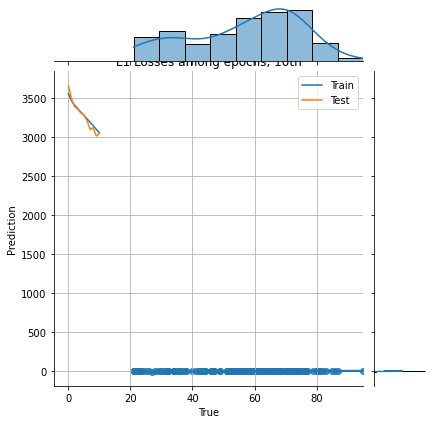

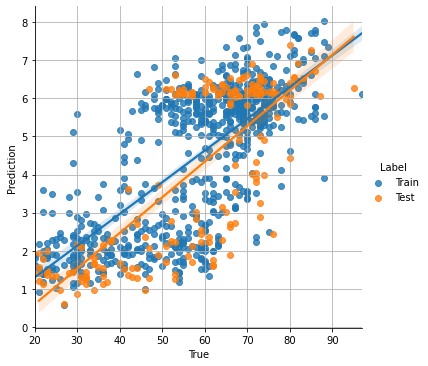

Epoch 12 / 100, BEST MAE 8.000
[train] 54.6 sec [valid] 13.9 sec 
[TRAIN]:: Loss=3003.657 Mae=52.738 Rmse=54.736 Corr=0.718 
[TEST ]:: Loss=2996.754 Mae=52.354 Rmse=54.677 Corr=0.757 
Epoch 13 / 100, BEST MAE 8.000
[train] 56.3 sec [valid] 15.0 sec 
[TRAIN]:: Loss=2955.019 Mae=52.296 Rmse=54.290 Corr=0.722 
[TEST ]:: Loss=2981.120 Mae=52.191 Rmse=54.535 Corr=0.711 
Epoch 14 / 100, BEST MAE 8.000
[train] 56.0 sec [valid] 15.4 sec 
[TRAIN]:: Loss=2905.458 Mae=51.849 Rmse=53.832 Corr=0.725 
[TEST ]:: Loss=2920.133 Mae=51.647 Rmse=53.974 Corr=0.724 
Epoch 15 / 100, BEST MAE 8.000


In [ ]:
fold = None
# cfg.epochs = 200
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(cfg.epochs):
    
    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs}, BEST MAE {cfg.best_mae:.3f}')
    
    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=False)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)
    elapsed_time = round(time.time() - start_time, 3)
       
    if cfg.best_mae > tst_dp.mae[-1]:
        
        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_name}/', is_best=True)
        
    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)
    
    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % 5 == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()
        
        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                               train=trn_dp, valid=tst_dp)
            write_db(db, data)
    
    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)
    
    torch.cuda.empty_cache()
    
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
        
mlflow.log_params(params)
mlflow.end_run()
cfg.best_mae = min(tst_dp.mae)
save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_name}/', is_best=True)

In [6]:
import yaml
cfg.best_mae = min(tst_dp.mae)
with open(f'./result/models/{run_name}/cfg.yml', 'w') as y:
    yaml.dump(cfg.get_dict(), y, default_flow_style=False)

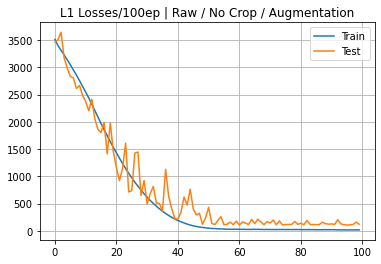

In [7]:
plt.title(f"L1 Losses/100ep | Raw / No Crop / Augmentation")

plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()

### kFold

In [8]:
models  = []
packets = []
tst_dp = DataPacket()

#### Whole Run

In [9]:
# test_db = make_db(page, client=client, schema=cfg['notion']['test_schema'], title='Test') if cfg['notion']['use'] else None
test_db = page.children[2]
fold_db = make_db(page, client=client, schema=cfg['notion']['schema'], title=f'Fold {fold+1}') if cfg['notion']['use'] else None

In [ ]:
for fold in range(16, cfg.folds):
    
    print(f'Fold {fold+1} / {cfg.folds}')
    mlflow.start_run(run_name=f'{today()} Fold {fold+1}')
    mlflow.log_params(params)
    mlflow.set_tags({
        'fold': fold+1
    })

    model, dps, res = run(cfg, fold, fold_db, mlflow=mlflow)
    models.append(model)
    packets.append(dps)
    
    cfg.test = True
    model, tst_dp, tst_res = eval(model, fn_lst, tst_dp, cfg, fold=None)
    
    df = pd.concat([make_df(res[0], 'Train'),
                   make_df(res[1], 'Valid'),
                   make_df(tst_res, 'Test')], ignore_index=True)
    
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()
    
    # Show Holdout testset information
    tst_dp.info('Holdout test')
    sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()
    
    if test_db:
        data = gather_data(f=fold, test=tst_dp)
        write_db(test_db, data)
    
    torch.cuda.empty_cache()
    clear_output(wait=True)

## Ensemble

### Naive Averaging

In [39]:
# Ensemble
preds = dict()
models = glob('./models/ensembles/*.pth')
for fold, state in enumerate(models):
    
    model, device = load_model('resnet', verbose=False)
    model = torch.load(state)
    
    model, (_, _, _), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                      loss_fn, mae_fn, rmse_fn,
                                      [], [], [])
    
    preds[f'model_{fold}'] = list(map(float, tst_preds[1]))
    
ensemble_results = pd.DataFrame(preds)
ensemble_results['Avg'] = ensemble_results.mean(axis=1)
ensemble_results['True'] = list(map(float, tst_preds[0]))

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [64]:
def result_plot(df):
    
    avg = torch.Tensor(ensemble_results['Avg'])
    tru = torch.Tensor(ensemble_results['True'])
    
    corr = ensemble_results.corr()['True']['Avg']
    mae_fn, rmse_fn = nn.L1Loss(), RMSELoss()
    
    print(f'Ensemble Results')
    print(f'MAE  = {float(mae_fn(avg, tru)):.3f}')
    print(f'RMSE = {float(rmse_fn(avg, tru)):.3f}')
    print(f'CORR = {corr:.3f}')
    
    sns.lmplot(data=ensemble_results, x='True', y='Avg')
    plt.grid()
    plt.show()

Ensemble Results
MAE  = 7.025
RMSE = 8.598
CORR = 0.854


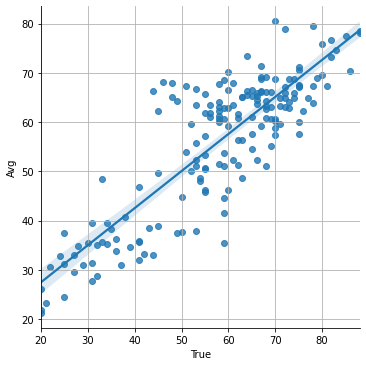

In [65]:
result_plot(ensemble_results)

### Blender

In [7]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [8]:
class CFG:
    
    model_name='resnet'
    dropout=0.1
    use_last_layer=True

In [10]:
class Ensemble(nn.Module):
    
    def __init__(self, model_list, CFG):
        super(Ensemble, self).__init__()
        
        self.cfg = CFG
        self.dropout = self.cfg.dropout
        self.models = dict()
        
        for idx, model_path in enumerate(model_list):
            
            model, device = load_model(self.cfg.model_name, verbose=False)
            model = torch.load(model_path)
            if not self.cfg.use_last_layer:
                model.fc = Identity()
                
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list) * 128, 128),
                    nn.Dropout(self.dropout),
                    nn.Linear(128, 1)
#                     nn.Dropout(self.dropout)
                )
                
            else:
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list), 1),
#                     nn.Dropout(self.dropout)
                )
                
            for param in model.parameters():
                param.requires_grad = False
                
            self.models[idx] = model
        
    def forward(self, x):
        
        vectors = list()
        for idx, model in self.models.items():
            vectors.append(model(x))
            
        x = torch.cat(vectors, dim=1)
        x = self.last_layer(x)
        
        return x

In [11]:
model_list = glob('./models/ensembles/rough/*.pth')
model_list.sort()
cfg = CFG()
cfg.use_last_layer = True
model = Ensemble(model_list, cfg).to(device)
with torch.no_grad():
    model.last_layer[0].weight.fill_(1 / len(model_list))
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


## SFCN Test

In [53]:
resnet, _ = load_model('resnet', verbose=True)

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

In [119]:
cfg.model_name = 'sfcn'
model, cfg.device = load_model(cfg.model_name, verbose=False)
optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

Model Sfcn is selected.


In [120]:
state_dict = torch.load('../UKBiobank_deep_pretrain/brain_age/run_20190719_00_epoch_best_mae.p')
state_dict = dict(state_dict)
keys = list(map(lambda x: x.split('module.')[-1], state_dict.keys()))
state_dict = {k: v for k, v in zip(keys, state_dict.values())}
model.load_state_dict(state_dict)

<All keys matched successfully>

In [52]:
summary(model, input_size=(1, 160, 192, 160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1    [-1, 32, 160, 192, 160]             896
       BatchNorm3d-2    [-1, 32, 160, 192, 160]              64
         MaxPool3d-3       [-1, 32, 80, 96, 80]               0
              ReLU-4       [-1, 32, 80, 96, 80]               0
            Conv3d-5       [-1, 64, 80, 96, 80]          55,360
       BatchNorm3d-6       [-1, 64, 80, 96, 80]             128
         MaxPool3d-7       [-1, 64, 40, 48, 40]               0
              ReLU-8       [-1, 64, 40, 48, 40]               0
            Conv3d-9      [-1, 128, 40, 48, 40]         221,312
      BatchNorm3d-10      [-1, 128, 40, 48, 40]             256
        MaxPool3d-11      [-1, 128, 20, 24, 20]               0
             ReLU-12      [-1, 128, 20, 24, 20]               0
           Conv3d-13      [-1, 256, 20, 24, 20]         884,992
      BatchNorm3d-14      [-1, 256, 20,

In [122]:
cfg.test = True
test_dset = MyDataset(cfg, augment=False, fold=None)
test_dl = DataLoader(test_dset, batch_size=16)

In [123]:
from tqdm import tqdm

In [124]:
mae = nn.L1Loss()

In [125]:
len(test_dl)

175

In [141]:
model.to(cfg.device)
model.eval()
y_preds, ys = [], []
age_bins = torch.tensor([42+i for i in range(40)])
with torch.no_grad(): # to not give loads on GPU... :(
    for i, (x, y) in tqdm(enumerate(test_dl)):

        x, y = F.interpolate(x, size=(160, 192, 160)).to(cfg.device), y.to(cfg.device)

        y_pred = model.forward(x)[0].to(cfg.device)
        y_pred = (np.exp(y_pred.squeeze().cpu()) * age_bins).sum()
#         y_pred = y_pred.max(axis=1).indices.squeeze()
#         y_pred += 42
        y_preds.append(y_pred)
        ys.append(y.squeeze())
#             loss = mae(y_pred, y.squeeze())


torch.cuda.empty_cache()

175it [01:34,  1.85it/s]
